In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bs4 import BeautifulSoup as soup # HTML parser
import requests # Page requests
import re # Regular expressions
import time # Time delays
import random # Random numbers

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} 
url = 'https://charlottesville.craigslist.org/search/vga?purveyor=owner#search=1~gallery~0~0' 
raw = requests.get(url,headers=header)

brands = ['nintendo', 'xbox', 'sony', 'playstation']
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="cl-static-search-result") 


In [33]:
data = []
for k in range (len(listings)):
    title = listings[k].find("div", class_="title").get_text().lower()
    price = listings[k].find("div",class_ = "price").get_text()
    link = listings[k].find(href=True)['href']

    words = title.split()
    hits = [word for word in words if word in brands]

    if any(ps_version in title for ps_version in ['ps3', 'ps4', 'ps5', 'playstation 4', 'playstation 5']):
        hits.append('playstation')

    if len(hits) == 0:
        brand = "missing"
    else:
        brand = hits[0]
    data.append({'title':title,'price':price,'link':link,'brand':brand})
    



In [34]:
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
print(df.shape)
df.to_csv('video_game.csv')
df.head()

(21, 4)


,title,price,link,brand
0,nintendo switch games new games added!,10,https://charlottesville.craigslist.org/vgm/d/w...,nintendo
1,death stranding playstation 4 game new sealed,15,https://charlottesville.craigslist.org/vgm/d/s...,playstation
2,cod modern warfare 2 ps3 game call of duty mod...,5,https://charlottesville.craigslist.org/vgm/d/s...,playstation
3,lots of cheap playstation 4 games (some sealed...,10,https://charlottesville.craigslist.org/vgm/d/s...,playstation
4,► penguin wars ps4 rare game,20,https://charlottesville.craigslist.org/vgm/d/c...,playstation


count      21.000000
mean      144.190476
std       324.559951
min         5.000000
25%        10.000000
50%        35.000000
75%       125.000000
max      1500.000000
Name: price, dtype: float64


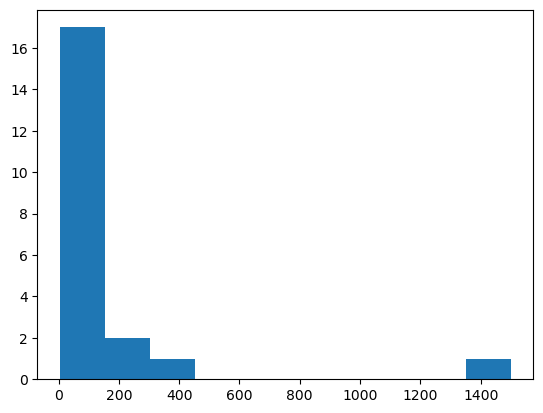

In [35]:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()

count     20.000000
mean      76.400000
std       96.423627
min        5.000000
25%       10.000000
50%       27.500000
75%      121.250000
max      400.000000
Name: price, dtype: float64


<Axes: >

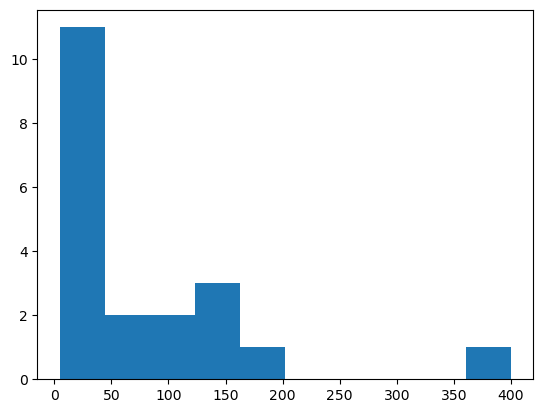

In [38]:
df.loc[:,['price','brand']].groupby('brand').describe()

# remove the outlier

df_filterd = df[df['brand'] != 'missing']
df_filterd.loc[:,['price','brand']].groupby('brand').describe()

print(df_filterd['price'].describe())
df_filterd['price'].hist(grid=False)

In this lab, I tried web scraping using video gaming content. The content that I derived from this web includes pricew brands, and links. After that, I ploted the histogram according to prices and I realized that there is one value that is way higher than the other, which I assume as the outlier, so I removed that and achieved a better plot.